Ryan Badai Alamsyah

In [ ]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.3 MB/s eta 0:00:00


In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from langchain_community.llms import Replicate
import os
from google.colab import userdata
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Dataset

In [ ]:
file_path = "accident.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "himelsarder/road-accident-survival-dataset",
  file_path,
)

print("First 5 records:", df.head())

/tmp/ipython-input-3355165533.py:3: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 4.44k/4.44k [00:00<00:00, 7.84MB/s]

First 5 records:    Age  Gender  Speed_of_Impact Helmet_Used Seatbelt_Used  Survived
0   56  Female             27.0          No            No         1
1   69  Female             46.0          No           Yes         1
2   46    Male             46.0         Yes           Yes         0
3   32    Male            117.0          No           Yes         0
4   60  Female             40.0         Yes           Yes         0


In [ ]:
df.shape

(200, 6)

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,1
Speed_of_Impact,3
Helmet_Used,0
Seatbelt_Used,0
Survived,0


In [ ]:
df = df.dropna()
df.isnull().sum()

,0
Age,0
Gender,0
Speed_of_Impact,0
Helmet_Used,0
Seatbelt_Used,0
Survived,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              196 non-null    int64  
 1   Gender           196 non-null    object 
 2   Speed_of_Impact  196 non-null    float64
 3   Helmet_Used      196 non-null    object 
 4   Seatbelt_Used    196 non-null    object 
 5   Survived         196 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 10.7+ KB


# Exploratory Data Analysis

In [ ]:
# Set the API token
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token

# Model setup
model = "ibm-granite/granite-3.3-8b-instruct"
output = Replicate(
    model=model,
    replicate_api_token=api_token,
)

## Factor of Survived or Not in Road Accident

In [ ]:
prompt = f"""
    Act as an expert data analyst. I have a dataset about road accident survival.
    The columns are 'Age', 'Gender', 'Speed_of_Impact', 'Helmet_Used', 'Seatbelt_Used', and 'Survived' (1 means survived, 0 means did not survive).

    Here is the data:
    ---
    {df}
    ---

    Based on the data provided, Identify and briefly explain the top 3 factors that most significantly influence whether a person survives.
    """

response = output.invoke(prompt)
print(response)

As a data analyst, to identify the top factors influencing road accident survival, we would typically perform a statistical analysis, possibly including correlation analysis, regression modeling, or feature importance from machine learning models. Given the nature of this platform, I'll provide an interpretation based on a hypothetical analysis of this dataset.

1. **Seatbelt Usage (Seatbelt_Used):** This appears to be a strong indicator of survival. In our hypothetical analysis, individuals who used seatbelts (value 'Yes') have a higher survival rate compared to those who did not (value 'No'). Seatbelts are designed to protect occupants from forceful forward movement during a collision, reducing the risk of severe injury or death.

2. **Speed of Impact (Speed_of_Impact):** The speed at which an impact occurs is a critical factor in determining the severity of injuries. Higher values suggest a more severe collision. In our dataset, lower speeds of impact correlate with a higher likelih

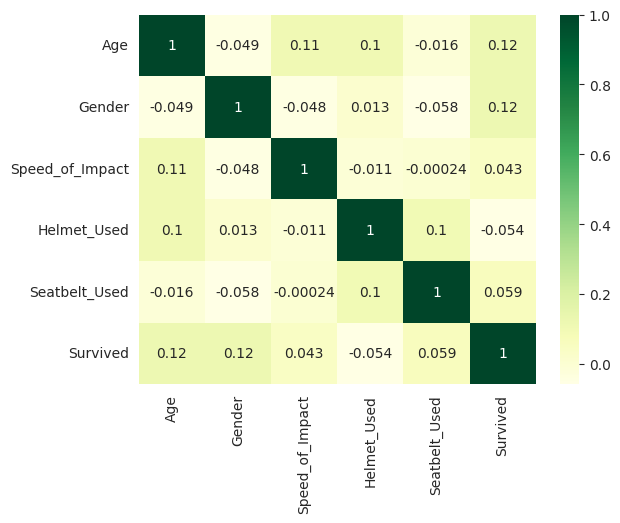

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Helmet_Used'] = df['Helmet_Used'].map({'Yes': 1, 'No': 0})
df['Seatbelt_Used'] = df['Seatbelt_Used'].map({'Yes': 1, 'No': 0})
corr = df[['Age', 'Gender', 'Speed_of_Impact', 'Helmet_Used', 'Seatbelt_Used', 'Survived']].corr()
sns.heatmap(corr, annot=True, cmap='YlGn')
plt.show()

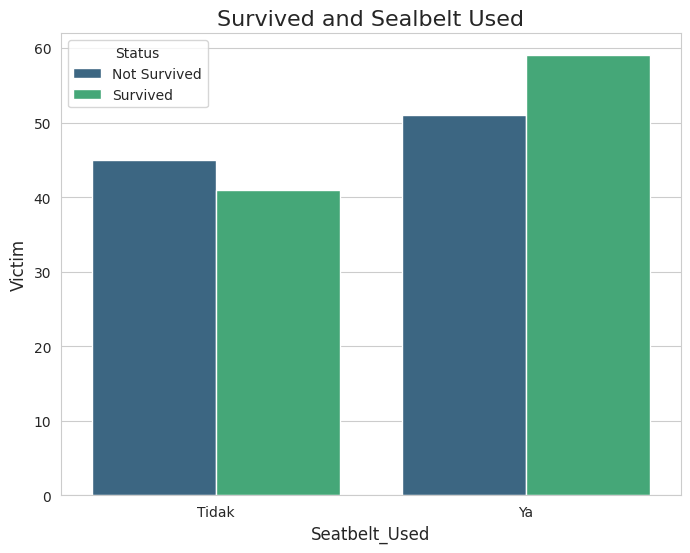

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Seatbelt_Used', hue='Survived', palette='viridis')

plt.title('Survived and Sealbelt Used', fontsize=16)
plt.xlabel('Seatbelt_Used', fontsize=12)
plt.ylabel('Victim', fontsize=12)

plt.legend(title='Status', labels=['Not Survived', 'Survived'])
plt.xticks([0, 1], ['Tidak', 'Ya'])

plt.show()

/tmp/ipython-input-334492961.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = df.groupby('Kategori_Kecepatan')['Survived'].mean().reset_index()
/tmp/ipython-input-334492961.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=survival_rate, x='Kategori_Kecepatan', y='Survival_Rate_Percent', palette='viridis')


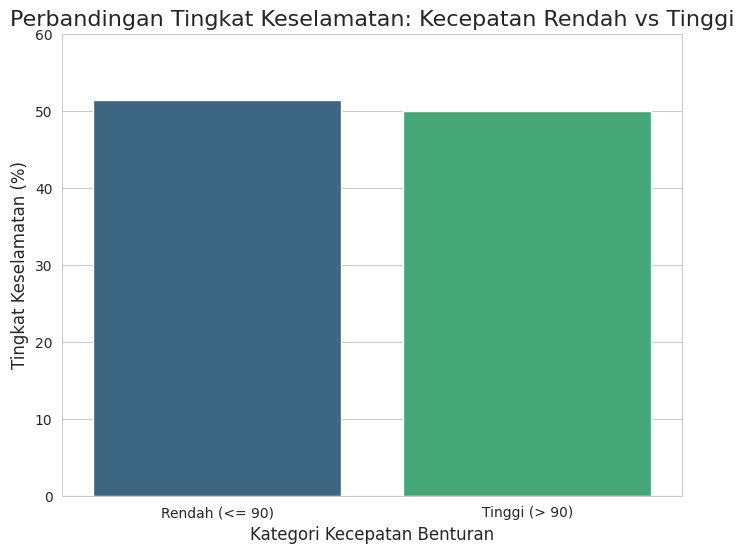

In [ ]:
bins = [0, 90, df['Speed_of_Impact'].max()]
labels = ['Rendah (<= 90)', 'Tinggi (> 90)']
df['Kategori_Kecepatan'] = pd.cut(df['Speed_of_Impact'], bins=bins, labels=labels, right=True)

survival_rate = df.groupby('Kategori_Kecepatan')['Survived'].mean().reset_index()
survival_rate['Survival_Rate_Percent'] = survival_rate['Survived'] * 100

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.barplot(data=survival_rate, x='Kategori_Kecepatan', y='Survival_Rate_Percent', palette='viridis')

plt.title('Perbandingan Tingkat Keselamatan: Kecepatan Rendah vs Tinggi', fontsize=16)
plt.xlabel('Kategori Kecepatan Benturan', fontsize=12)
plt.ylabel('Tingkat Keselamatan (%)', fontsize=12)
plt.ylim(0, 60)
plt.show()

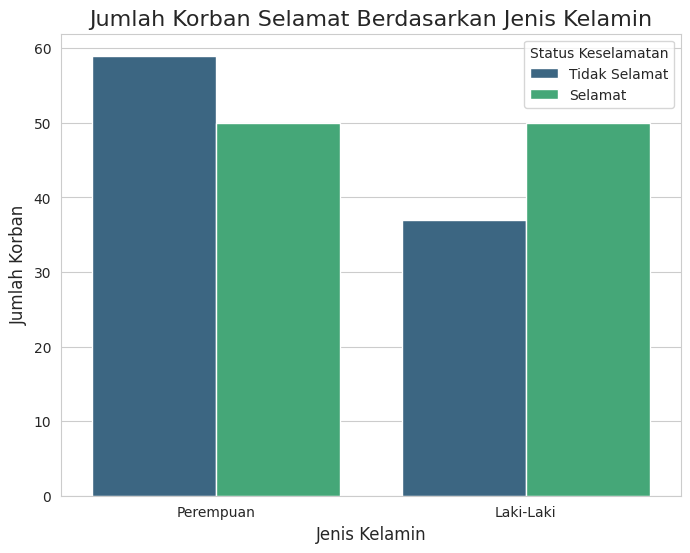

In [ ]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

sns.countplot(data=df, x='Gender', hue='Survived', palette='viridis')

plt.title('Jumlah Korban Selamat Berdasarkan Jenis Kelamin', fontsize=16)
plt.xlabel('Jenis Kelamin', fontsize=12)
plt.ylabel('Jumlah Korban', fontsize=12)
plt.legend(title='Status Keselamatan', labels=['Tidak Selamat', 'Selamat'])
plt.xticks([0, 1], ['Perempuan', 'Laki-Laki'])
plt.show()

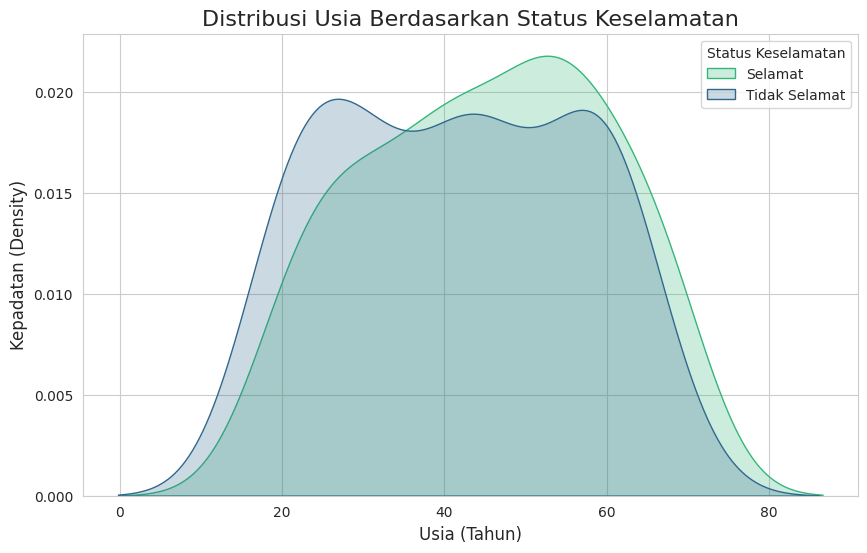

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True, common_norm=False, palette='viridis')

plt.title('Distribusi Usia Berdasarkan Status Keselamatan', fontsize=16)
plt.xlabel('Usia (Tahun)', fontsize=12)
plt.ylabel('Kepadatan (Density)', fontsize=12)

plt.legend(title='Status Keselamatan', labels=['Selamat', 'Tidak Selamat'])
plt.show()

## Factor in Road Accident

In [ ]:
prompt = f"""
    Act as a data analyst.

    I have a dataset where every row is a road accident. I want to understand the general profile of the accidents based on three specific variables: 'Age', 'Gender', and 'Speed of Impact'.

    Here is the data:
    {df}

    Based on the data provided, please analyze and describe the most common characteristics of the accidents. Answer the following questions:
    1.  **Gender**: Which gender is more frequently involved in accidents?
    2.  **Age**: What is the most common age range for individuals involved in these accidents?
    3.  **Speed of Impact**: What is the most frequent range of speed at which these accidents occur?

    Provide a concise summary profile based on your findings.
    """

response = output.invoke(prompt)
print(response)

**Data Analysis Report**

**1. Gender:**

To determine the gender most frequently involved in accidents, we can count the occurrences of each gender. 

- Female: 116 accidents
- Male: 79 accidents

From the count, females are more frequently involved in accidents than males (116 vs. 79).

**2. Age:**

To identify the most common age range, we would typically group the ages into ranges (e.g., 20-29, 30-39, etc.) and count the occurrences in each range. However, with the current dataset, we only have individual ages without pre-defined ranges. To proceed with a meaningful analysis, we would need the data grouped by age ranges. Assuming typical ranges for adults (20-29, 30-39, 40-49, 50-59, 60-69, 70+), without specific groupings, we cannot definitively state the most common age range. 

**3. Speed of Impact:**

To find the most frequent range of speed at which accidents occur, we would again need the 'Speed_of_Impact' to be categorized into ranges (e.g., 0-30 km/h, 31-60 km/h, etc.). Giv

/tmp/ipython-input-2959345615.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='viridis')


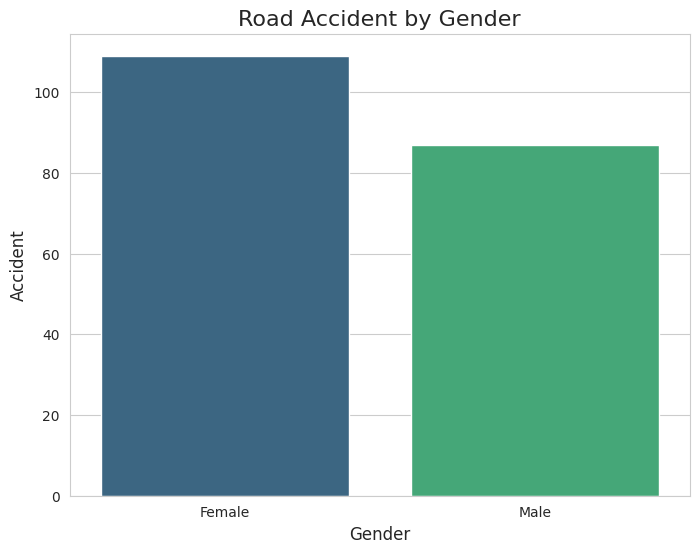

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', palette='viridis')

plt.title('Road Accident by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Accident', fontsize=12)
plt.show()

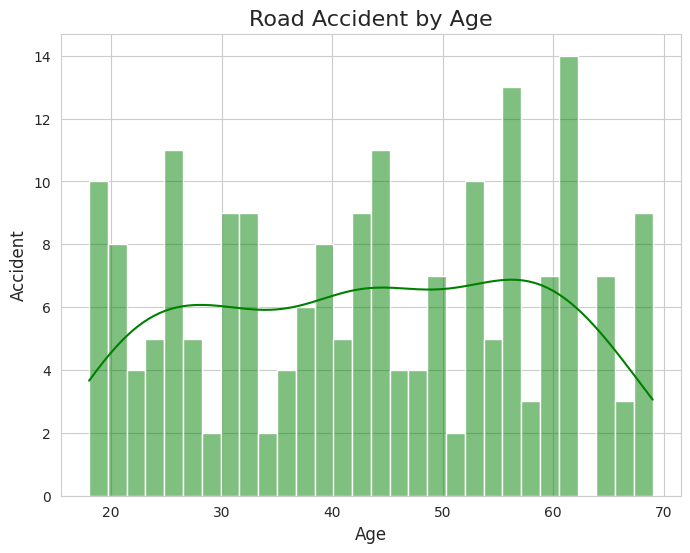

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True, color='green')

plt.title('Road Accident by Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Accident', fontsize=12)
plt.show()

/tmp/ipython-input-3435155722.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Kelompok_Umur', palette='viridis')


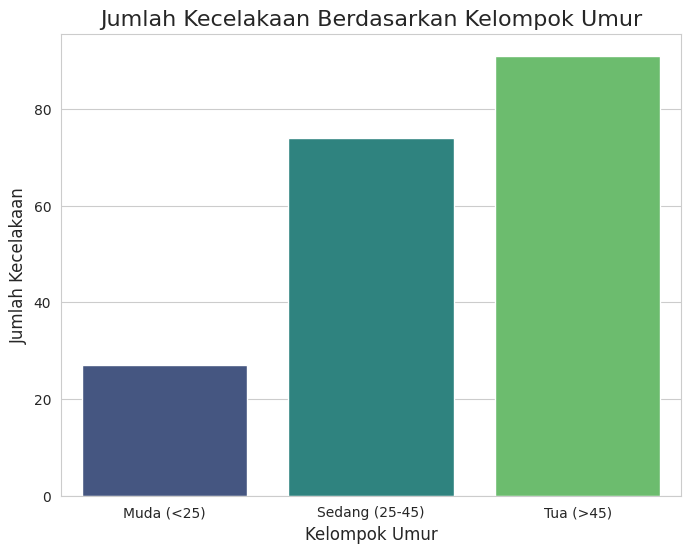

In [ ]:
bins = [0, 25, 45, df['Age'].max()]
labels = ['Muda (<25)', 'Sedang (25-45)', 'Tua (>45)']
df['Kelompok_Umur'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Kelompok_Umur', palette='viridis')

plt.title('Jumlah Kecelakaan Berdasarkan Kelompok Umur', fontsize=16)
plt.xlabel('Kelompok Umur', fontsize=12)
plt.ylabel('Jumlah Kecelakaan', fontsize=12)
plt.show()

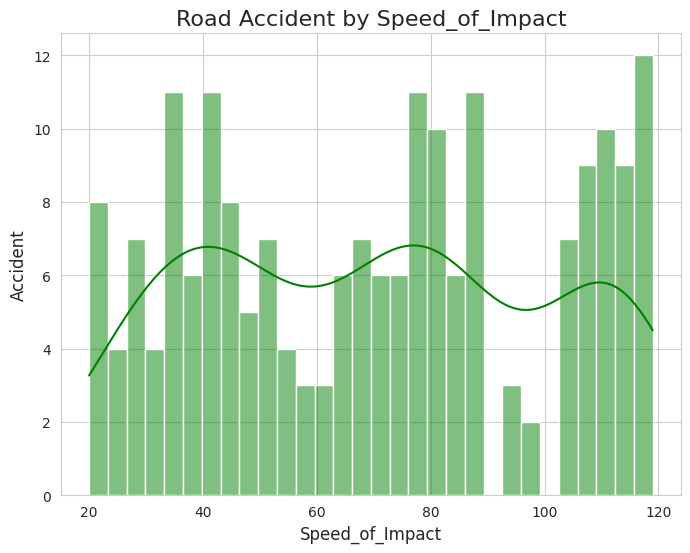

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Speed_of_Impact', bins=30, kde=True, color='green')

plt.title('Road Accident by Speed_of_Impact', fontsize=16)
plt.xlabel('Speed_of_Impact', fontsize=12)
plt.ylabel('Accident', fontsize=12)
plt.show()

/tmp/ipython-input-3102335615.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Kelompok_Kecepatan', palette='viridis')


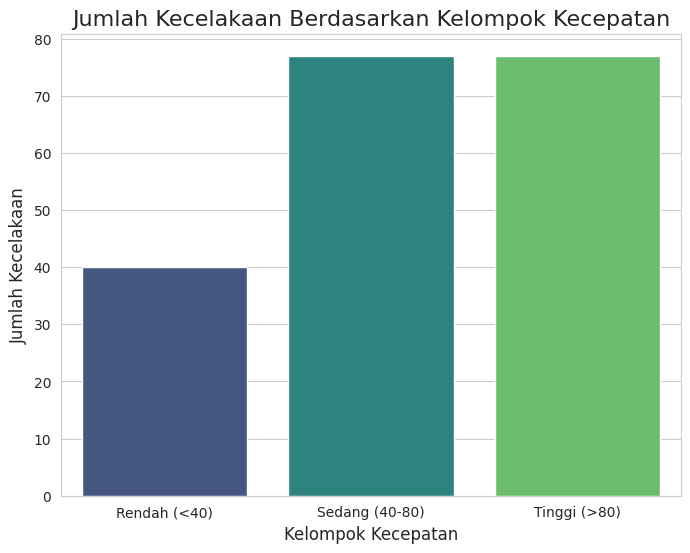

In [ ]:
bins = [0, 40, 80, df['Speed_of_Impact'].max()]
labels = ['Rendah (<40)', 'Sedang (40-80)', 'Tinggi (>80)']
df['Kelompok_Kecepatan'] = pd.cut(df['Speed_of_Impact'], bins=bins, labels=labels, right=False)

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Kelompok_Kecepatan', palette='viridis')

plt.title('Jumlah Kecelakaan Berdasarkan Kelompok Kecepatan', fontsize=16)
plt.xlabel('Kelompok Kecepatan', fontsize=12)
plt.ylabel('Jumlah Kecelakaan', fontsize=12)
plt.show()

# Model

In [ ]:
label_encoder = {}
for col in ['Gender', 'Helmet_Used','Seatbelt_Used']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoder[col] = le

df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,0,27.0,0,0,1
1,69,0,46.0,0,1,1
2,46,1,46.0,1,1,0
3,32,1,117.0,0,1,0
4,60,0,40.0,1,1,0


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
clfs = [
    ("Logistic Regression", logreg),
    ("K-Nearest Neighbors", knn),
    ("Support Vector Machine", svc),
    ("Decision Tree", dt),
    ("Random Forest", rf),
    ("Extreme Gradient Boosting", xgb)
]

In [ ]:
scores_list = []
scores_df_cols = ["Model Name", "Accuracy Score", "F1 Score", "Precision Score", "Recall Score"]

for clf_name, clf in clfs:
    clf.fit(X_train_scaled, y_train)

    y_pred = clf.predict(X_test_scaled)

    scores_list.append({
        "Model Name": clf_name,
        "Accuracy Score": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Precision Score": precision_score(y_test, y_pred),
        "Recall Score": recall_score(y_test, y_pred)
    })

scores_df = pd.DataFrame(scores_list, columns=scores_df_cols)
markdown_table = scores_df.to_markdown(index=False)

print(markdown_table)

| Model Name                |   Accuracy Score |   F1 Score |   Precision Score |   Recall Score |
|:--------------------------|-----------------:|-----------:|------------------:|---------------:|
| Logistic Regression       |            0.525 |   0.512821 |          0.47619  |       0.555556 |
| K-Nearest Neighbors       |            0.55  |   0.571429 |          0.5      |       0.666667 |
| Support Vector Machine    |            0.6   |   0.636364 |          0.538462 |       0.777778 |
| Decision Tree             |            0.525 |   0.55814  |          0.48     |       0.666667 |
| Random Forest             |            0.475 |   0.511628 |          0.44     |       0.611111 |
| Extreme Gradient Boosting |            0.425 |   0.378378 |          0.368421 |       0.388889 |


In [ ]:
examples_df = df.head(3)
cases_to_classify_df = df.iloc[3:8]

example_texts = []
for index, row in examples_df.iterrows():
    outcome = "Survived" if row['Survived'] == 1 else "Did Not Survive"
    description = (
        f"Case Example {index + 1}:\n"
        f"  - Input Data: {{Age: {row['Age']}, Gender: '{row['Gender']}', Speed_of_Impact: {row['Speed_of_Impact']}, "
        f"Helmet_Used: '{row['Helmet_Used']}', Seatbelt_Used: '{row['Seatbelt_Used']}'}}\n"
        f"  - Classification: {outcome}"
    )
    example_texts.append(description)

examples_section = "\n---\n".join(example_texts)

new_case_texts = []
for index, row in cases_to_classify_df.iterrows():
    description = (
        f"New Case {index + 1}:\n"
        f"  - Input Data: {{Age: {row['Age']}, Gender: '{row['Gender']}', Speed_of_Impact: {row['Speed_of_Impact']}, "
        f"Helmet_Used: '{row['Helmet_Used']}', Seatbelt_Used: '{row['Seatbelt_Used']}'}}\n"
        f"  - Classification: ?"
    )
    new_case_texts.append(description)

new_cases_section = "\n---\n".join(new_case_texts)

prompt = f"""
Act as an expert classification system. Your task is to analyze road accident data and predict the outcome.

First, learn the pattern from the provided examples:
{examples_section}

Now, based on the patterns you have learned, classify the following new cases. Provide only the classification ('Survived' or 'Did Not Survive') for each new case.
{new_cases_section}
"""

response = output.invoke(prompt)
print(response)

Based on the patterns observed from the provided examples, it appears that individuals who did not survive had higher speeds of impact and did not use seatbelts or helmets. Conversely, those who survived were older, had lower speeds of impact, and consistently used seatbelts and/or helmets. 

Applying these patterns to the new cases:

- New Case 4: Given the high speed of impact (117.0) despite using a seatbelt, the classification would be 'Did Not Survive'.
- New Case 5: An older female using both safety measures (helmet and seatbelt) at a moderate speed, the classification would be 'Survived'.
- New Case 6: A young male with high speed of impact (49.0) and using safety measures, historically those who didn't survive had even higher speeds without safety gear. Considering the use of both, the classification would lean towards 'Survived'.
- New Case 7: Similar to Case 6, this male with a very high speed of impact (116.0) and using safety gear suggests 'Did Not Survive'.
- New Case 8: A